In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import zipfile
# import os

# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/emotion/challenge.zip" , "r")
# zip_ref.extractall("/content/drive/MyDrive/emotion/datasets")
# zip_ref.close()

In [3]:
# zip_ref2 = zipfile.ZipFile("/content/drive/MyDrive/emotion/datasets/fer2013/tar" , "r")

In [4]:
pwd

'/content'

In [5]:
cd /content/drive/MyDrive/emotion/datasets

/content/drive/MyDrive/emotion/datasets


In [6]:
pwd


'/content/drive/MyDrive/emotion/datasets'

In [7]:
# load csv using pandas
import pandas

filename ="/content/drive/MyDrive/emotion/datasets/train.csv"
names = ["label" , "img_string"]
data = pandas.read_csv(filename)
print(data.shape)

# filename2 ="/content/drive/MyDrive/emotion/datasets/test.csv"
# test = pandas.read_csv(filename2)
# print(test.shape)

(28709, 2)


In [8]:
data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [10]:
#test.dtypes

In [11]:
dataset_array = data.to_numpy()

# test_array = test.to_numpy()

In [12]:
#test_array.shape

In [13]:
dataset_labels = dataset_array[:,0].astype(int)

In [14]:
dataset_labels

array([0, 0, 2, ..., 4, 0, 4])

In [15]:
import numpy as np

dataset_img = np.zeros((28709,2304))
test_img = np.zeros((7178,2304))

for i in range(dataset_array.shape[0]):
  dataset_img[i] = dataset_array[i,1].split()

# for i in range(test_array.shape[0]):
#   test_img[i] = test_array[i,0].split()  

In [16]:
# test_img[0]

In [17]:
type(dataset_img[0,0])

numpy.float64

In [18]:
# data["pixels"] = pandas.to_numeric(data["pixels"] , errors = "coerce")
# data,dtypes
# data.head - outputted all nans :( after to numeric


In [19]:
# test_img.shape

In [20]:
# dataset_img contains images for the model in numpy array
# dataset_labels contain label for images from 1 to 6

# defining some global stuff
num_examples = dataset_array.shape[0]
dataset_img = dataset_img.reshape((num_examples , 48 , 48 , 1))

# num_test_examples = test_array.shape[0]
# test_img = test_img.reshape(( num_test_examples , 48 , 48 , 1))


In [21]:
dataset_labels.reshape((num_examples , 1))

array([[0],
       [0],
       [2],
       ...,
       [4],
       [0],
       [4]])

In [22]:
# test_img.shape

In [23]:
# creating list of indices to be put in validation set
# import random

# num_validation = int ( num_examples / 10)
# random_list_validation = random.sample(range(1 , num_examples) , num_validation)
# creating validation set
# validation_img = np.zeros(num_validation , 48 , 48)
# validation_labels = np.zeros(num_validation ,1)

# for i,j in enumerate(random_list_validation):
  # validation_img[i] = dataset_img[j]
  # validation_labels[i] = dataset_labels[j]

############################rather than following this method it would be better to first shuffle the dataset arrays and then just divide the first 10 to validation set  
  

In [24]:
num_validation = int(num_examples/10)
#seed = 2
#np.random.seed(seed)
#np.random.shuffle(dataset_img)
#np.random.seed(seed)
#np.random.shuffle(dataset_labels)


In [25]:
validation_x = dataset_img[:num_validation]
validation_label = dataset_labels[:num_validation]

training_x = dataset_img[num_validation:]
training_label = dataset_labels[num_validation:]

# test_x = test_img

In [26]:
training_x.shape

(25839, 48, 48, 1)

In [27]:
validation_x.shape

(2870, 48, 48, 1)

In [28]:
# ohc = np.eye(7)

In [29]:
# ohc

In [30]:
one_hot_class = np.array([
                  [1 ,0 ,0 ,0 ,0 ,0 ,0],
                  [0, 1, 0, 0, 0, 0 ,0],
                  [0, 0, 1, 0, 0, 0 ,0],
                  [0, 0, 0, 1, 0, 0 ,0],
                  [0, 0, 0, 0, 1, 0 ,0],
                  [0, 0, 0, 0, 0, 1 ,0],
                  [0, 0, 0, 0, 0, 0 ,1]
                                    ])
validation_y = np.zeros((num_validation ,7))
training_y = np.zeros((training_label.shape[0] ,7))

In [31]:
for i in range(num_validation):
  j = validation_label[i]
  # print(type(one_hot_class[j]))
  validation_y[i] = one_hot_class[j]

for i in range(training_label.shape[0]):
  j = training_label[i]
  training_y[i] = one_hot_class[j]

In [32]:
validation_y[0]
training_x.shape

(25839, 48, 48, 1)

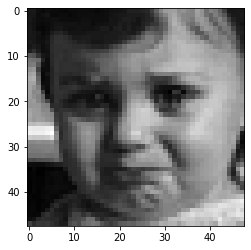

[0. 0. 0. 0. 1. 0. 0.]


In [33]:
# show an img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
index = 5000
image = (training_x[index] * 255).reshape(48,48)
plt.imshow(image , cmap = "gray")
plt.show()
print(training_y[index])

In [34]:
training_y[0]

array([0., 0., 0., 0., 0., 0., 1.])

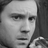

In [35]:
# show an img 2
import cv2
from google.colab.patches import cv2_imshow

image = dataset_img[0].reshape(48,48)
cv2_imshow(image)

In [36]:
print(dataset_labels[1])

0


In [37]:
training_x = training_x.astype("float")/255
validation_x = validation_x.astype("float")/255

In [38]:
# so we have training_x , training_y , validation_x , validation_y now
# now we can start defining the model
from keras import models
from keras import layers

# defining a convnet

num_filter_1 = 64
num_filter_2 = 128
num_filter_3 = 256
num_filter_4 = 512

teju_model = models.Sequential()

teju_model.add(layers.Conv2D(num_filter_1 , (3,3) , activation="relu" , input_shape=(48,48,1)))
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.2))

###################################################################
teju_model.add(layers.BatchNormalization())
#teju_model.add(layers.Activation('relu'))

teju_model.add(layers.Conv2D(num_filter_2 , (3,3) , activation="relu"))
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.5))
#####################################################################
teju_model.add(layers.BatchNormalization())
#teju_model.add(layers.Activation('relu'))

teju_model.add(layers.Conv2D(num_filter_3 , (3,3) , activation="relu"))
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.5))
#######################################################################
teju_model.add(layers.BatchNormalization())
# teju_model.add(layers.Activation('relu'))

teju_model.add(layers.Conv2D(num_filter_4 , (3,3) , activation="relu"))
teju_model.add(layers.MaxPooling2D((2,2)))
teju_model.add(layers.Dropout(0.5))

# teju_model.add(layers.BatchNormalization())
# teju_model.add(layers.Activation('relu'))



In [39]:
# adding a classifier

num_units_1 = 256
num_units_2 = 7
num_units_3 = 64

teju_model.add(layers.Flatten())

teju_model.add(layers.BatchNormalization())

teju_model.add(layers.Dense( num_units_1 , activation="relu"))
teju_model.add(layers.Dropout(0.5))
########################################################################

teju_model.add(layers.BatchNormalization())
# teju_model.add(layers.Activation('relu'))

teju_model.add(layers.Dense( num_units_3 , activation="relu"))
teju_model.add(layers.Dropout(0.5))

#teju_model.add(layers.BatchNormalization())
#teju_model.add(layers.Activation('relu'))

teju_model.add(layers.Dense( num_units_2 , activation="softmax"))
#########################################################################




In [40]:
teju_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 128)       0

 now we have ready trainig_x normalized and trainig_y as one hot encoded

In [41]:
from keras import optimizers

opt = optimizers.Adam(learning_rate = 0.001)
teju_model.compile(optimizer=opt ,loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
# compiling the model and fiiting on train images


teju_history = teju_model.fit( training_x , 
                              training_y , 
                              epochs = 100 , 
                              batch_size = 512 , 
                              validation_data = (validation_x , validation_y))

Epoch 1/100
51/51 [==============================] - 56s 140ms/step - loss: 2.6013 - accuracy: 0.1833 - val_loss: 1.8710 - val_accuracy: 0.2477
Epoch 2/100
51/51 [==============================] - 4s 82ms/step - loss: 2.1010 - accuracy: 0.1909 - val_loss: 1.8439 - val_accuracy: 0.2477
Epoch 3/100
51/51 [==============================] - 4s 82ms/step - loss: 1.9346 - accuracy: 0.2060 - val_loss: 1.8383 - val_accuracy: 0.2477
Epoch 4/100
51/51 [==============================] - 4s 83ms/step - loss: 1.8713 - accuracy: 0.2202 - val_loss: 1.8266 - val_accuracy: 0.2477
Epoch 5/100
51/51 [==============================] - 4s 83ms/step - loss: 1.8386 - accuracy: 0.2276 - val_loss: 1.8191 - val_accuracy: 0.2477
Epoch 6/100
51/51 [==============================] - 4s 86ms/step - loss: 1.8145 - accuracy: 0.2398 - val_loss: 1.8214 - val_accuracy: 0.2477
Epoch 7/100
51/51 [==============================] - 4s 84ms/step - loss: 1.7977 - accuracy: 0.2476 - val_loss: 1.8192 - val_accuracy: 0.2477
Epoc

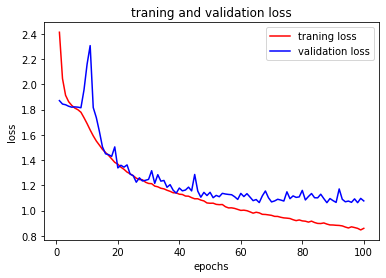

In [44]:
# plotting training and validation loss

loss = teju_history.history["loss"]
val_loss = teju_history.history["val_loss"]

epochs = range(1 , len(loss)+1)

plt.plot(epochs , loss , "r" , label="traning loss")
plt.plot(epochs , val_loss , "b" , label="validation loss")
plt.title("traning and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

In [ ]:
print(teju_history.history.keys())

In [46]:
# seed = 2
# x = np.array([ 3, 5, 4,6,7 ,8 ,8,9 , 12 ,34 , 6 ,789 , 23 ,24,45 ])
# y = x.copy()
# np.random.seed(seed)
# np.random.shuffle(x)
# np.random.seed(seed)
# np.random.shuffle(y)